### Herat Zaveri

### CS675

### Professor Li Daming

### HW2 - Home Loan Default Predictions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


loan_df = pd.read_csv('LoanData//LoanDefaultData.csv')
loan_df.head()

,Unnamed: 0,Unnamed: 0.1,id,loan_default,AP001,AP002,AP003,AP004,AP005,AP006,...,CD162,CD164,CD166,CD167,CD169,CD170,CD172,CD173,MB005,MB007
0,0,1,1,1,31,2,1,12,2017/7/6 10:21,ios,...,13.0,13.0,0.0,0.0,1449.0,1449.0,2249.0,2249.0,7.0,IPHONE7
1,1,2,2,0,27,1,1,12,2017/4/6 12:51,h5,...,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,NaN,WEB
2,2,3,3,0,33,1,4,12,2017/7/1 14:11,h5,...,3.0,2.0,33.0,0.0,33.0,0.0,143.0,110.0,8.0,WEB
3,3,4,4,0,34,2,4,12,2017/7/7 10:10,android,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,OPPO
4,4,5,5,0,47,2,1,12,2017/7/6 14:37,h5,...,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,NaN,WEB


In [2]:
loan_df.describe()

,Unnamed: 0,Unnamed: 0.1,id,loan_default,AP001,AP002,AP003,AP004,AP007,AP008,...,CD160,CD162,CD164,CD166,CD167,CD169,CD170,CD172,CD173,MB005
count,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.00000,80000.000000,...,79619.000000,79619.000000,79619.000000,79619.000000,79619.000000,79619.000000,79619.00000,79619.000000,79619.000000,77207.000000
mean,39999.500000,40000.500000,40000.500000,0.193600,31.706913,1.321813,2.014925,11.235413,3.30130,3.117200,...,6.911956,14.271694,11.773358,909.089313,810.786219,1732.693314,1539.33443,2513.226491,2229.606137,5.976272
std,23094.155105,23094.155105,23094.155105,0.395121,7.075070,0.467174,1.196806,2.212313,1.33655,1.306335,...,28.007499,38.235012,33.270641,1379.553332,1245.044602,2441.503517,2172.71384,3404.975112,3005.615048,3.641814
min,0.000000,1.000000,1.000000,0.000000,20.000000,1.000000,1.000000,3.000000,1.00000,1.000000,...,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.00000,-99.000000,-99.000000,0.000000
25%,19999.750000,20000.750000,20000.750000,0.000000,27.000000,1.000000,1.000000,12.000000,2.00000,2.000000,...,2.000000,5.000000,4.000000,84.000000,34.000000,309.000000,226.00000,539.000000,414.000000,3.000000
50%,39999.500000,40000.500000,40000.500000,0.000000,30.000000,1.000000,1.000000,12.000000,3.00000,3.000000,...,7.000000,12.000000,10.000000,475.000000,397.000000,1023.000000,870.00000,1553.000000,1324.000000,5.000000
75%,59999.250000,60000.250000,60000.250000,0.000000,35.000000,2.000000,3.000000,12.000000,5.00000,4.000000,...,14.000000,23.000000,20.000000,1209.000000,1080.000000,2287.000000,2030.00000,3296.000000,2936.000000,8.000000
max,79999.000000,80000.000000,80000.000000,1.000000,56.000000,2.000000,6.000000,12.000000,5.00000,5.000000,...,1061.000000,2792.000000,1579.000000,48585.000000,29664.000000,88364.000000,54651.00000,125352.000000,87312.000000,47.000000


In [3]:
age = loan_df['AP001']
gender = loan_df['AP002']
educ = loan_df['AP003']
loan_amnt = loan_df['CR009'].values

data = {
    'Age': age.values,
    'Gender': gender.values,
    'Education': educ.values,
    'Loan': loan_amnt
}

new_df = pd.DataFrame(data)
new_df.head(10)

,Age,Gender,Education,Loan
0,31,2,1,35807
1,27,1,1,7254
2,33,1,4,30377
3,34,2,4,0
4,47,2,1,0
5,32,1,1,20643
6,23,1,3,0
7,40,2,3,0
8,25,1,3,2500
9,27,2,4,90800


### Note:

Here I have used 4 features to better predict the loan defaults. I have used age, gender, education, and loan amount to see which demographics has higher defailt rate.



## Logistic Regression: 

In [4]:
X = new_df
y = loan_df['loan_default']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [5]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [6]:
predictions = logmodel.predict(X_test)
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [7]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.81      1.00      0.89     19398
           1       0.00      0.00      0.00      4602

    accuracy                           0.81     24000
   macro avg       0.40      0.50      0.45     24000
weighted avg       0.65      0.81      0.72     24000



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


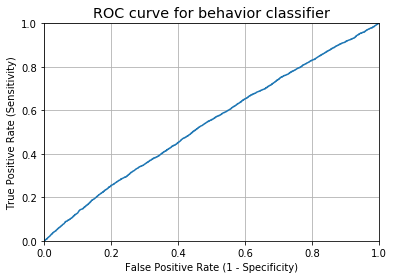

In [8]:
# probs_y is a 2-D array of probability of being labeled as 0 (first column of array) vs 1 (2nd column in array)
probs_y=logmodel.predict_proba(X_test) 

fpr, tpr, thresholds = metrics.roc_curve(y_test,probs_y[:,1])

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for behavior classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

Results Interpretation:

Based on ROC curve our model is predicting fairly evenly and our classification report shows a f-1 score of accuracy at 0.80. So our algorithm based on split is predicting accurately but may need more data for better predictions.

### KNN: 

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=42, stratify=y)
#classifier
from sklearn.neighbors import KNeighborsClassifier


neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    
    knn = KNeighborsClassifier(n_neighbors=k)
    
   
    knn.fit(X_train, y_train)
    
    
    train_accuracy[i] = knn.score(X_train, y_train)
    
    
    test_accuracy[i] = knn.score(X_test, y_test) 

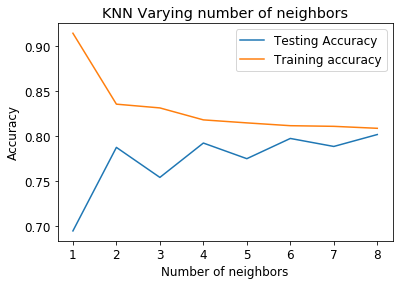

In [10]:
plt.title('KNN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [12]:
#accuracy closest at knn = 8
knn = KNeighborsClassifier(n_neighbors=8)
#fit model
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

In [13]:
print("Accuracy", knn.score(X_test,y_test))

Accuracy 0.8018125


In [15]:
#let us get the predictions using the classifier fit 
y_pred = knn.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [16]:
#classofication report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.99      0.89     25805
           1       0.22      0.01      0.02      6195

    accuracy                           0.80     32000
   macro avg       0.51      0.50      0.45     32000
weighted avg       0.69      0.80      0.72     32000



Results Interpretation:

Based on the K closest neighboor algorithm our accuracy is closest at 8 so we fit classifer their and get a 0.80 accuracy which is above 0.7 so our algorithm is fairly good at predictions. Furthermore we predict the future values of y based on our x. Through the classification report we have accuracy of 0.80 with 32000 supporting data, which is pretty high. So our algorithm iss very good at predicting loan defaults.

## Naive Bayles:

In [17]:
# split test and train
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=1)

#use Navies Baylis
from sklearn.naive_bayes import GaussianNB 

model = GaussianNB()                      
model.fit(Xtrain, ytrain)                 

GaussianNB(priors=None, var_smoothing=1e-09)

In [18]:
y_model = model.predict(Xtest) 

In [19]:
from sklearn.metrics import accuracy_score

accuracy_score(ytest, y_model)

0.8069

In [20]:
Xtest.head(3)

,Age,Gender,Education,Loan
7126,33,2,3,52570
46624,25,1,4,14000
67020,31,1,4,104400


In [21]:
y_model

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

Results Interpretation:  

From our Naive Bayles algorithm we predict the accuracy fairly quickly. It is 0.81 which is close to other algorithms. So our Naive Bayles is also doing good job with predictions as it is higher than 0.7.